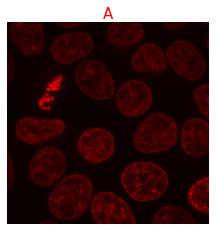

In [29]:
from skimage.data import cells3d
from microfilm.microplot import microshow
from skimage.filters import gaussian

data = cells3d()
membrane_image = data[30,1]

vis = microshow(membrane_image)
vis.add_channel_labels("A")

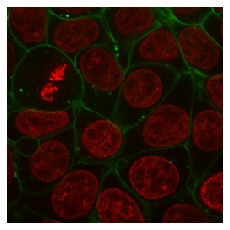

Exception: Image should be unsigned integer but yours is float64

In [14]:
microshow?

Signature:
microshow(
    images=None,
    cmaps=None,
    flip_map=False,
    rescale_type=None,
    limits=None,
    num_colors=256,
    proj_type='max',
    channel_names=None,
    channel_label_show=False,
    channel_label_type='title',
    channel_label_size=0.05,
    scalebar_thickness=5,
    scalebar_unit_per_pix=None,
    scalebar_size_in_units=None,
    unit=None,
    scalebar_ypos=0.05,
    scalebar_color='white',
    scalebar_font_size=0.08,
    scalebar_text_centered=True,
    ax=None,
    fig_scaling=3,
    dpi=72,
    label_text=None,
    label_location='upper left',
    label_color='white',
    label_font_size=15,
    microim=None,
)
Docstring:
Plot image

Parameters
----------
images: list or array
    list of 2d arrays or DxMxN array D<4
cmaps: str of list of str
    colormap names. For single image you can pass a str
flip_map: bool or list of bool
    invert colormap or not
rescale_type: str or list of str
    'min_max': between extrema values of image
    'dtype': f